Confusion Matrix:
 [[68 19]
 [18 38]]


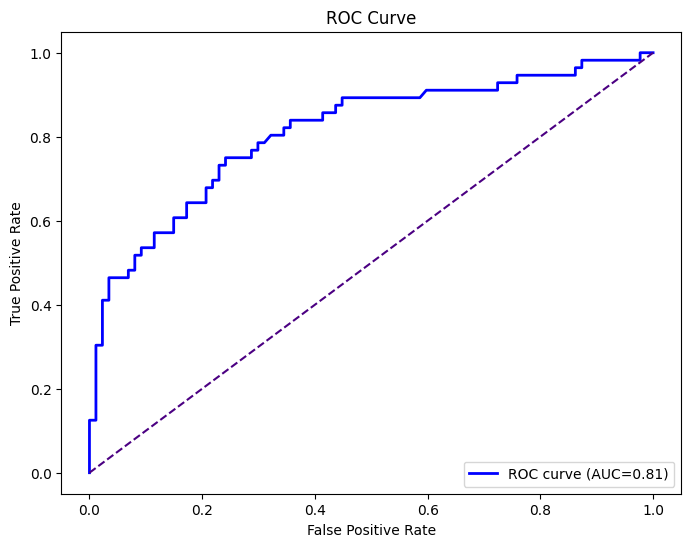

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df=pd.read_csv(url)
df=df[['Pclass','Sex','Age','Fare','Survived']].dropna()
df['Sex']=df['Sex'].map({'male':0,'female':1})

X,y=df.drop(columns=['Survived']),df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[:,1]

cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

fpr,tpr,_=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='indigo',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()